<a href="https://colab.research.google.com/github/BossAyush07/Deep-Learning-Projects/blob/master/CIFAR10_ConvNet_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Important Libraries

In [1]:
# Loading Libraries
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

### Accessing gpu for model

In [2]:
# Model to device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### Downloading and Loading the Dataset

In [60]:
# MNIST dataset
train_dataset = torchvision.datasets.CIFAR10(root='/data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='/data/',
                                          train=False, 
                                          transform=transforms.ToTensor())



Files already downloaded and verified


In [61]:
# Data loader
batch_size = 400
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [62]:
img_arr = np.array(train_dataset[0][0])
img_arr

array([[[0.23137255, 0.16862746, 0.19607843, ..., 0.61960787,
         0.59607846, 0.5803922 ],
        [0.0627451 , 0.        , 0.07058824, ..., 0.48235294,
         0.46666667, 0.47843137],
        [0.09803922, 0.0627451 , 0.19215687, ..., 0.4627451 ,
         0.47058824, 0.42745098],
        ...,
        [0.8156863 , 0.7882353 , 0.7764706 , ..., 0.627451  ,
         0.21960784, 0.20784314],
        [0.7058824 , 0.6784314 , 0.7294118 , ..., 0.72156864,
         0.38039216, 0.3254902 ],
        [0.69411767, 0.65882355, 0.7019608 , ..., 0.84705883,
         0.5921569 , 0.48235294]],

       [[0.24313726, 0.18039216, 0.1882353 , ..., 0.5176471 ,
         0.49019608, 0.4862745 ],
        [0.07843138, 0.        , 0.03137255, ..., 0.34509805,
         0.3254902 , 0.34117648],
        [0.09411765, 0.02745098, 0.10588235, ..., 0.32941177,
         0.32941177, 0.28627452],
        ...,
        [0.6666667 , 0.6       , 0.6313726 , ..., 0.52156866,
         0.12156863, 0.13333334],
        [0.5

In [63]:
img_arr.shape

(3, 32, 32)

### Vizualizing the data

In [64]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

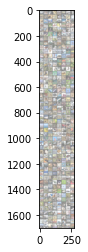

  car   cat   cat  frog


In [65]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Setting up the Hyper parameters

In [67]:

# Hyper parameters
num_epochs = 20
num_classes = 10
learning_rate = 0.001


### Creating conv network

In [68]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = nn.Linear(4*4*64, num_classes)
        
        
    def forward(self, x):
        out = F.pad(x, (1, 1, 1, 1))
        out = self.layer1(out)
        out = F.pad(out, (1, 1, 1, 1))
        out = self.layer2(out)
        out = F.pad(out, (1, 1, 1, 1))
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out


In [69]:
model = ConvNet(num_classes).to(device)

### Applying Optimizer to minimize loss function

In [70]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [71]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/20], Step [100/125], Loss: 1.2819
Epoch [2/20], Step [100/125], Loss: 1.0266
Epoch [3/20], Step [100/125], Loss: 0.8767
Epoch [4/20], Step [100/125], Loss: 0.8530
Epoch [5/20], Step [100/125], Loss: 0.8512
Epoch [6/20], Step [100/125], Loss: 0.8853
Epoch [7/20], Step [100/125], Loss: 0.6937
Epoch [8/20], Step [100/125], Loss: 0.8211
Epoch [9/20], Step [100/125], Loss: 0.6317
Epoch [10/20], Step [100/125], Loss: 0.5411
Epoch [11/20], Step [100/125], Loss: 0.6416
Epoch [12/20], Step [100/125], Loss: 0.4802
Epoch [13/20], Step [100/125], Loss: 0.5914
Epoch [14/20], Step [100/125], Loss: 0.5481
Epoch [15/20], Step [100/125], Loss: 0.6015
Epoch [16/20], Step [100/125], Loss: 0.4913
Epoch [17/20], Step [100/125], Loss: 0.5414
Epoch [18/20], Step [100/125], Loss: 0.5353
Epoch [19/20], Step [100/125], Loss: 0.4325
Epoch [20/20], Step [100/125], Loss: 0.4769


In [72]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Test Accuracy of the model on the 10000 test images: 72.41 %


In [73]:

torch.save(model.state_dict(), 'model.ckpt')